In [1]:
# Import the needed packages
import math
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
import seaborn as sns
import networkx as nx

In [2]:
# read in the needed data
agent_log_1_df = pd.read_csv('/users/yzhan636/data/akhann16/cadre_simulated_data/2022-10-21/agent_log.csv')
counts_log_1_df = pd.read_csv('/users/yzhan636/data/akhann16/cadre_simulated_data/2022-10-21/counts_log.csv')
network_log_1_df = pd.read_csv('/users/yzhan636/data/akhann16/cadre_simulated_data/2022-10-21/network_log.csv')

In [3]:
# Print out the number of connections in each time step
network_1_count_summary = network_log_1_df.groupby(['tick'])['tick'].count()
network_1_count_summary = pd.DataFrame(data=network_1_count_summary)
print(network_1_count_summary)

# The first time starts at time 1

       tick
tick       
1     49799
11    49809
21    49827
31    49834
41    49843
...     ...
951   49825
961   49823
971   49823
981   49821
991   49855

[100 rows x 1 columns]


In [4]:
network_log_1_df_time_0 = network_log_1_df.loc[network_log_1_df['tick'] == 0]
network_log_1_df_time_1 = network_log_1_df.loc[network_log_1_df['tick'] == 1]
network_log_1_df_time_91 = network_log_1_df.loc[network_log_1_df['tick'] == 91]
network_log_1_df_time_491 = network_log_1_df.loc[network_log_1_df['tick'] == 491]
network_log_1_df_time_991 = network_log_1_df.loc[network_log_1_df['tick'] == 991]

agent_log_1_df_time_0 = agent_log_1_df.loc[agent_log_1_df['tick'] == 0]
agent_log_1_df_time_1 = agent_log_1_df.loc[agent_log_1_df['tick'] == 1]
agent_log_1_df_time_91 = agent_log_1_df.loc[agent_log_1_df['tick'] == 91]
agent_log_1_df_time_491 = agent_log_1_df.loc[agent_log_1_df['tick'] == 491]
agent_log_1_df_time_991 = agent_log_1_df.loc[agent_log_1_df['tick'] == 991]

### Q1: How many transitions occur for an agent’s alcohol use status and smoking status?

In [5]:
print(agent_log_1_df_time_1)

      tick  agent_id  agent_age agent_race  agent_female  \
0        1         0         57   Hispanic             0   
1        1         1         61   Hispanic             0   
2        1         2         44      White             1   
3        1         3         38      Asian             1   
4        1         4         58   Hispanic             0   
...    ...       ...        ...        ...           ...   
9995     1      9996         35      White             1   
9996     1      9997         49      White             0   
9997     1      9998         38      White             1   
9998     1      9999         57      Black             0   
9999     1     10000         18      White             0   

      agent_alc_use_status agent_smoking_status  \
0                        1                Never   
1                        1               Former   
2                        1                Never   
3                        1                Never   
4                       

In [6]:
def count_alc_trans(agent_id_i):
    agent_log_1_df_agent_i = agent_log_1_df.loc[agent_log_1_df['agent_id'] == agent_id_i]
    agent_log_1_df_agent_i_alc_list = agent_log_1_df_agent_i['agent_alc_use_status'].tolist()
    agent_log_1_df_agent_i_alc_list_temp = [agent_log_1_df_agent_i_alc_list[0]] + agent_log_1_df_agent_i_alc_list
    alc_change_times = 0
    for i in range(len(agent_log_1_df_agent_i_alc_list)):
        if agent_log_1_df_agent_i_alc_list[i] != agent_log_1_df_agent_i_alc_list_temp[i]:
            alc_change_times += 1
    #print("agent", agent_id_i ,"alcohol status changes", alc_change_times, "times")
    return(alc_change_times)
    
def count_smoke_trans(agent_id_i):
    agent_log_1_df_agent_i = agent_log_1_df.loc[agent_log_1_df['agent_id'] == agent_id_i]
    agent_log_1_df_agent_i_smoke_list = agent_log_1_df_agent_i['agent_smoking_status'].tolist()
    agent_log_1_df_agent_i_smoke_list_temp = [agent_log_1_df_agent_i_smoke_list[0]] + agent_log_1_df_agent_i_smoke_list
    smoke_change_times = 0
    for i in range(len(agent_log_1_df_agent_i_smoke_list)):
        if agent_log_1_df_agent_i_smoke_list[i] != agent_log_1_df_agent_i_smoke_list_temp[i]:
            smoke_change_times += 1
    #print("agent", agent_id_i ,"smoke status changes", smoke_change_times, "times")
    return(smoke_change_times)


In [7]:
all_alc_change_list = []
all_smoke_change_list = []
for id in agent_log_1_df['agent_id'].unique():
    all_alc_change_list.append(count_alc_trans(id))
    all_smoke_change_list.append(count_smoke_trans(id))
    

print(np.mean(all_alc_change_list))
print(np.mean(all_smoke_change_list))


15.788255223037831
8.513739883305101


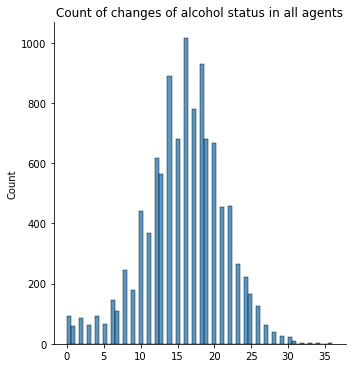

In [8]:
sns.displot(all_alc_change_list).set(title='Count of changes of alcohol status in all agents')

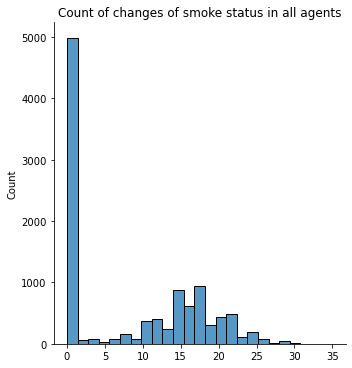

In [9]:
sns.displot(all_smoke_change_list).set(title='Count of changes of smoke status in all agents')

### Q2: What is the distribution for the number of incarceration episodes for each person? 

In [10]:
print(agent_log_1_df.loc[agent_log_1_df['agent_current_incarceration_status'] == 1])

        tick  agent_id  agent_age agent_race  agent_female  \
5          1         5         26      White             0   
25         1        25         31   Hispanic             0   
32         1        32         42   Hispanic             1   
44         1        44         62      White             1   
49         1        49         38      White             1   
...      ...       ...        ...        ...           ...   
999991   991     10618         18      White             0   
999992   991     10619         18      White             1   
999993   991     10620         18   Hispanic             1   
999994   991     10621         18   Hispanic             0   
999995   991     10622         18      White             0   

        agent_alc_use_status agent_smoking_status  \
5                          3                Never   
25                         1              Current   
32                         1                Never   
44                         1               

In [11]:
def count_incarceration_episode_length(agent_id_i):
    agent_log_1_df_agent_i = agent_log_1_df.loc[agent_log_1_df['agent_id'] == agent_id_i]
    agent_log_1_df_agent_i_inc_cur_list = agent_log_1_df_agent_i['agent_current_incarceration_status'].tolist()
    agent_log_1_df_agent_i_inc_cur_list_temp = [agent_log_1_df_agent_i_inc_cur_list[0]] + agent_log_1_df_agent_i_inc_cur_list
    
    agent_log_1_df_agent_i_last_rel_list = agent_log_1_df_agent_i['agent_last_release_tick'].tolist()
    agent_log_1_df_agent_i_last_inc_list = agent_log_1_df_agent_i['agent_last_incarceration_tick'].tolist()
    
    episode_length = 0
    for i in range(len(agent_log_1_df_agent_i_inc_cur_list)):
        if (agent_log_1_df_agent_i_inc_cur_list[i] == 0) and (agent_log_1_df_agent_i_inc_cur_list_temp[i] == 1):
            episode_length += (agent_log_1_df_agent_i_last_rel_list[i] - agent_log_1_df_agent_i_last_inc_list[i])
    return(episode_length)

In [12]:
all_episode_length_list = []

for id in agent_log_1_df['agent_id'].unique():
    all_episode_length_list.append(count_incarceration_episode_length(id))
    

print(np.mean(all_episode_length_list))


260.8431206474685


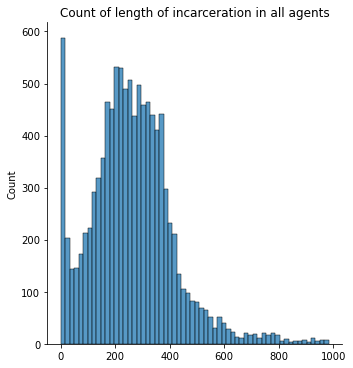

In [13]:
sns.displot(all_episode_length_list).set(title='Count of length of incarceration in all agents')

In [14]:
def count_incarceration_episode(agent_id_i):
    agent_log_1_df_agent_i = agent_log_1_df.loc[agent_log_1_df['agent_id'] == agent_id_i]
    agent_log_1_df_agent_i_inc_cur_list = agent_log_1_df_agent_i['agent_current_incarceration_status'].tolist()
    agent_log_1_df_agent_i_inc_cur_list_temp = [agent_log_1_df_agent_i_inc_cur_list[0]] + agent_log_1_df_agent_i_inc_cur_list
    
    incarceration_episode = 0
    
    for i in range(len(agent_log_1_df_agent_i_inc_cur_list)):
        if (agent_log_1_df_agent_i_inc_cur_list[i] == 0) and (agent_log_1_df_agent_i_inc_cur_list_temp[i] == 1):
            incarceration_episode += 1
    
    return(incarceration_episode)

In [15]:
all_episode_list = []

for id in agent_log_1_df['agent_id'].unique():
    all_episode_list.append(count_incarceration_episode(id))
    

print(np.mean(all_episode_list))


3.3770939205721815


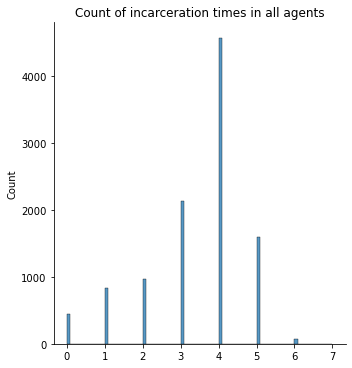

In [16]:
sns.displot(all_episode_list).set(title='Count of incarceration times in all agents')

### Q4: Some extra analysis about the features at the agent data

In [17]:
# Lets take a look at the mean ages of different time tick
def count_mean_age(tick_i):
    agent_log_1_df_time_i = agent_log_1_df.loc[agent_log_1_df['tick'] == tick_i]
    agent_log_1_df_time_i_age_list = agent_log_1_df_time_i['agent_age'].tolist()
    return(np.mean(agent_log_1_df_time_i_age_list))

In [18]:
all_mean_age_list = []
for tick in agent_log_1_df['tick'].unique():
    all_mean_age_list.append([tick,count_mean_age(tick)])
    
    
all_mean_age_list_df = pd.DataFrame(all_mean_age_list, columns=["time_tick", "mean_age"])

[Text(0.5, 1.0, 'Mean age of agents at all time stack')]

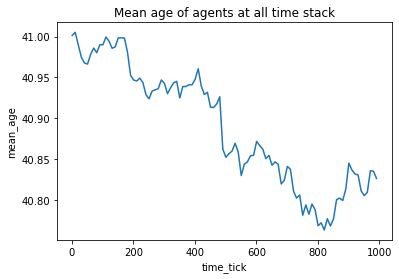

In [19]:
sns.lineplot(data=all_mean_age_list_df, x="time_tick", y="mean_age").set(title='Mean age of agents at all time stack')

In [20]:
# Number of Females
def count_num_female(tick_i):
    agent_log_1_df_time_i = agent_log_1_df.loc[agent_log_1_df['tick'] == tick_i]
    agent_log_1_df_time_i_female_list = agent_log_1_df_time_i['agent_female'].tolist()
    return(np.sum(agent_log_1_df_time_i_female_list))

In [21]:
all_count_female_list = []
for tick in agent_log_1_df['tick'].unique():
    all_count_female_list.append([tick,count_num_female(tick)])
    
    
all_count_female_list_df = pd.DataFrame(all_count_female_list, columns=["time_tick", "count_females"])

[Text(0.5, 1.0, 'Count_of_female agents at all time stack')]

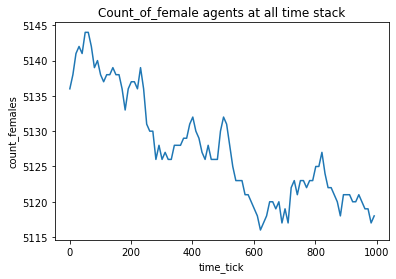

In [22]:
sns.lineplot(data=all_count_female_list_df, x="time_tick", y="count_females").set(title='Count_of_female agents at all time stack')

### Q4: Visualize the networks: beginning, middle, end. Create different versions of this network structure, Sub network plots divided by race and gender, try different features

In [23]:
# White, black, asian, hipanic
agent_log_1_df_time_1 = agent_log_1_df.loc[agent_log_1_df['tick'] == 1]

agent_log_1_df_time_1_white_male = agent_log_1_df_time_1.loc[(agent_log_1_df_time_1['agent_race'] == 'White') & (agent_log_1_df_time_1['agent_female'] == 0)]
agent_log_1_df_time_1_white_female = agent_log_1_df_time_1.loc[(agent_log_1_df_time_1['agent_race'] == 'White') & (agent_log_1_df_time_1['agent_female'] == 1)]

agent_log_1_df_time_1_black_male = agent_log_1_df_time_1.loc[(agent_log_1_df_time_1['agent_race'] == 'Black') & (agent_log_1_df_time_1['agent_female'] == 0)]
agent_log_1_df_time_1_black_female = agent_log_1_df_time_1.loc[(agent_log_1_df_time_1['agent_race'] == 'Black') & (agent_log_1_df_time_1['agent_female'] == 1)]

agent_log_1_df_time_1_asian_male = agent_log_1_df_time_1.loc[(agent_log_1_df_time_1['agent_race'] == 'Asian') & (agent_log_1_df_time_1['agent_female'] == 0)]
agent_log_1_df_time_1_asian_female = agent_log_1_df_time_1.loc[(agent_log_1_df_time_1['agent_race'] == 'Asian') & (agent_log_1_df_time_1['agent_female'] == 1)]

agent_log_1_df_time_1_hispanic_male = agent_log_1_df_time_1.loc[(agent_log_1_df_time_1['agent_race'] == 'Hispanic') & (agent_log_1_df_time_1['agent_female'] == 0)]
agent_log_1_df_time_1_hispanic_female = agent_log_1_df_time_1.loc[(agent_log_1_df_time_1['agent_race'] == 'Hispanic') & (agent_log_1_df_time_1['agent_female'] == 1)]

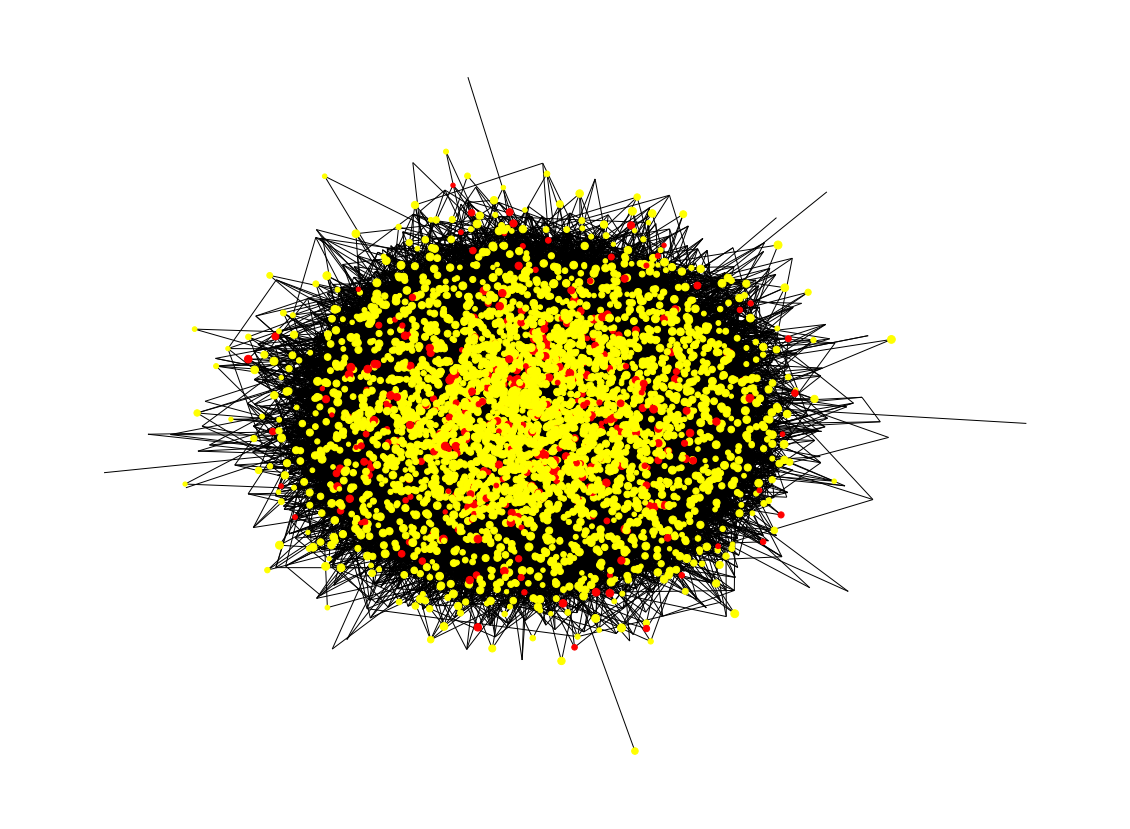

In [24]:
# Here are the plots for white male at time stick 1

# Create graph object
fig, ax = plt.subplots(figsize=(20, 15))

G = nx.from_pandas_edgelist(network_log_1_df_time_1, 'p1', 'p2', create_using=nx.Graph())

# Make types into categories
agent_log_1_df_time_1_white_male = agent_log_1_df_time_1_white_male.set_index('agent_id')
agent_log_1_df_time_1_white_male = agent_log_1_df_time_1_white_male.reindex(G.nodes())

agent_log_1_df_time_1_white_male['agent_current_incarceration_status'] = pd.Categorical(agent_log_1_df_time_1_white_male['agent_current_incarceration_status'])
agent_log_1_df_time_1_white_male['agent_current_incarceration_status'].cat.codes

# Specify colors
cmap = matplotlib.colors.ListedColormap(['yellow', 'red'])



# Draw graph

nx.draw(G, with_labels=False, node_size=agent_log_1_df_time_1_white_male['agent_age'], node_color=agent_log_1_df_time_1_white_male['agent_current_incarceration_status'].cat.codes, cmap=cmap)


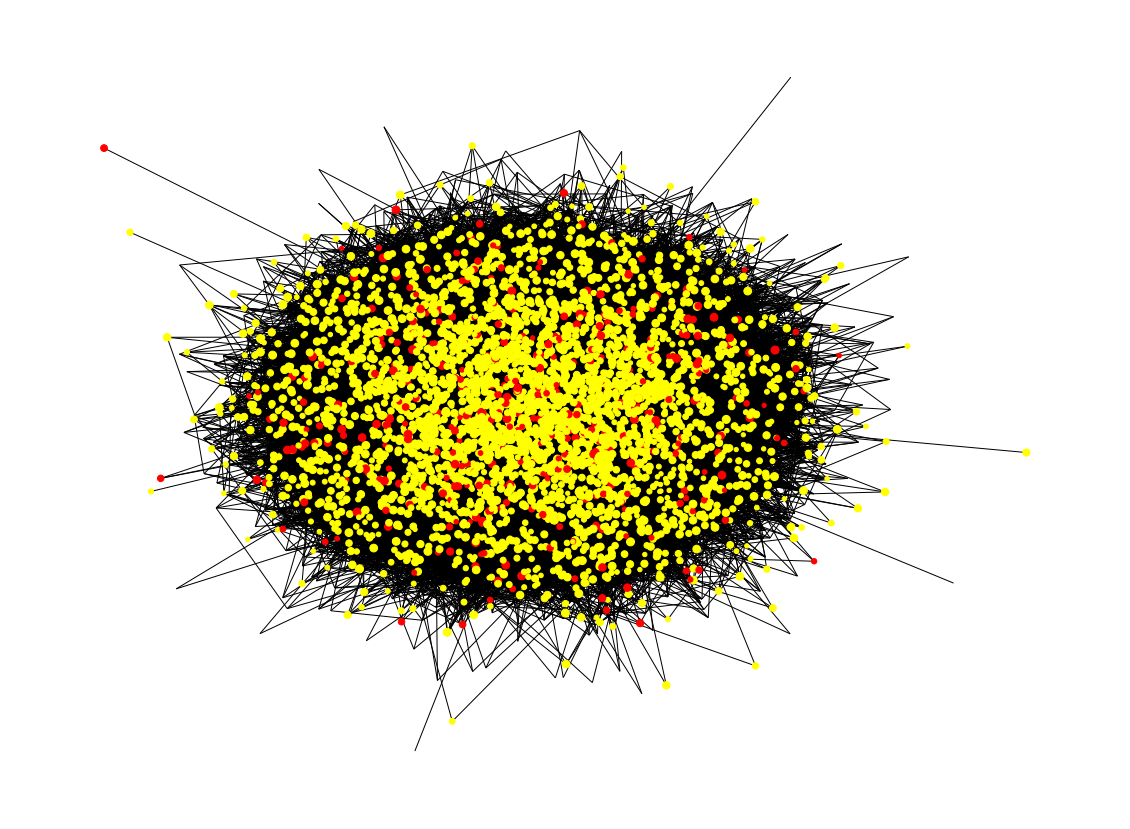

In [25]:
# Here are the plots for white female at time stick 1

# Create graph object
fig, ax = plt.subplots(figsize=(20, 15))

G = nx.from_pandas_edgelist(network_log_1_df_time_1, 'p1', 'p2', create_using=nx.Graph())

# Make types into categories
agent_log_1_df_time_1_white_female = agent_log_1_df_time_1_white_female.set_index('agent_id')
agent_log_1_df_time_1_white_female = agent_log_1_df_time_1_white_female.reindex(G.nodes())

agent_log_1_df_time_1_white_female['agent_current_incarceration_status'] = pd.Categorical(agent_log_1_df_time_1_white_female['agent_current_incarceration_status'])
agent_log_1_df_time_1_white_female['agent_current_incarceration_status'].cat.codes

# Specify colors
cmap = matplotlib.colors.ListedColormap(['yellow', 'red'])



# Draw graph

nx.draw(G, with_labels=False, node_size=agent_log_1_df_time_1_white_female['agent_age'], node_color=agent_log_1_df_time_1_white_female['agent_current_incarceration_status'].cat.codes, cmap=cmap)


In [ ]:
# Here are the plots for black male at time stick 1

# Create graph object
fig, ax = plt.subplots(figsize=(20, 15))

G = nx.from_pandas_edgelist(network_log_1_df_time_1, 'p1', 'p2', create_using=nx.Graph())

# Make types into categories
agent_log_1_df_time_1_black_male = agent_log_1_df_time_1_black_male.set_index('agent_id')
agent_log_1_df_time_1_black_male = agent_log_1_df_time_1_black_male.reindex(G.nodes())

agent_log_1_df_time_1_black_male['agent_current_incarceration_status'] = pd.Categorical(agent_log_1_df_time_1_black_male['agent_current_incarceration_status'])
agent_log_1_df_time_1_black_male['agent_current_incarceration_status'].cat.codes

# Specify colors
cmap = matplotlib.colors.ListedColormap(['yellow', 'red'])



# Draw graph

nx.draw(G, with_labels=False, node_size=agent_log_1_df_time_1_black_male['agent_age'], node_color=agent_log_1_df_time_1_black_male['agent_current_incarceration_status'].cat.codes, cmap=cmap)


In [ ]:
# Here are the plots for black female at time stick 1

# Create graph object
fig, ax = plt.subplots(figsize=(20, 15))

G = nx.from_pandas_edgelist(network_log_1_df_time_1, 'p1', 'p2', create_using=nx.Graph())

# Make types into categories
agent_log_1_df_time_1_black_female = agent_log_1_df_time_1_black_female.set_index('agent_id')
agent_log_1_df_time_1_black_female = agent_log_1_df_time_1_black_female.reindex(G.nodes())

agent_log_1_df_time_1_black_female['agent_current_incarceration_status'] = pd.Categorical(agent_log_1_df_time_1_black_female['agent_current_incarceration_status'])
agent_log_1_df_time_1_black_female['agent_current_incarceration_status'].cat.codes

# Specify colors
cmap = matplotlib.colors.ListedColormap(['yellow', 'red'])



# Draw graph

nx.draw(G, with_labels=False, node_size=agent_log_1_df_time_1_black_female['agent_age'], node_color=agent_log_1_df_time_1_black_female['agent_current_incarceration_status'].cat.codes, cmap=cmap)


In [ ]:
# Here are the plots for asian male at time stick 1

# Create graph object
fig, ax = plt.subplots(figsize=(20, 15))

G = nx.from_pandas_edgelist(network_log_1_df_time_1, 'p1', 'p2', create_using=nx.Graph())

# Make types into categories
agent_log_1_df_time_1_asian_male = agent_log_1_df_time_1_asian_male.set_index('agent_id')
agent_log_1_df_time_1_asian_male = agent_log_1_df_time_1_asian_male.reindex(G.nodes())

agent_log_1_df_time_1_asian_male['agent_current_incarceration_status'] = pd.Categorical(agent_log_1_df_time_1_asian_male['agent_current_incarceration_status'])
agent_log_1_df_time_1_asian_male['agent_current_incarceration_status'].cat.codes

# Specify colors
cmap = matplotlib.colors.ListedColormap(['yellow', 'red'])



# Draw graph

nx.draw(G, with_labels=False, node_size=agent_log_1_df_time_1_asian_male['agent_age'], node_color=agent_log_1_df_time_1_asian_male['agent_current_incarceration_status'].cat.codes, cmap=cmap)


In [ ]:
# Here are the plots for asian female at time stick 1

# Create graph object
fig, ax = plt.subplots(figsize=(20, 15))

G = nx.from_pandas_edgelist(network_log_1_df_time_1, 'p1', 'p2', create_using=nx.Graph())

# Make types into categories
agent_log_1_df_time_1_asian_female = agent_log_1_df_time_1_asian_female.set_index('agent_id')
agent_log_1_df_time_1_asian_female = agent_log_1_df_time_1_asian_female.reindex(G.nodes())

agent_log_1_df_time_1_asian_female['agent_current_incarceration_status'] = pd.Categorical(agent_log_1_df_time_1_asian_female['agent_current_incarceration_status'])
agent_log_1_df_time_1_asian_female['agent_current_incarceration_status'].cat.codes

# Specify colors
cmap = matplotlib.colors.ListedColormap(['yellow', 'red'])



# Draw graph

nx.draw(G, with_labels=False, node_size=agent_log_1_df_time_1_asian_female['agent_age'], node_color=agent_log_1_df_time_1_asian_female['agent_current_incarceration_status'].cat.codes, cmap=cmap)


In [ ]:
# Here are the plots for hispanic male at time stick 1

# Create graph object
fig, ax = plt.subplots(figsize=(20, 15))

G = nx.from_pandas_edgelist(network_log_1_df_time_1, 'p1', 'p2', create_using=nx.Graph())

# Make types into categories
agent_log_1_df_time_1_hispanic_male = agent_log_1_df_time_1_hispanic_male.set_index('agent_id')
agent_log_1_df_time_1_hispanic_male = agent_log_1_df_time_1_hispanic_male.reindex(G.nodes())

agent_log_1_df_time_1_hispanic_male['agent_current_incarceration_status'] = pd.Categorical(agent_log_1_df_time_1_hispanic_male['agent_current_incarceration_status'])
agent_log_1_df_time_1_hispanic_male['agent_current_incarceration_status'].cat.codes

# Specify colors
cmap = matplotlib.colors.ListedColormap(['yellow', 'red'])



# Draw graph

nx.draw(G, with_labels=False, node_size=agent_log_1_df_time_1_hispanic_male['agent_age'], node_color=agent_log_1_df_time_1_hispanic_male['agent_current_incarceration_status'].cat.codes, cmap=cmap)


In [ ]:
# Here are the plots for hispanic female at time stick 1

# Create graph object
fig, ax = plt.subplots(figsize=(20, 15))

G = nx.from_pandas_edgelist(network_log_1_df_time_1, 'p1', 'p2', create_using=nx.Graph())

# Make types into categories
agent_log_1_df_time_1_hispanic_female = agent_log_1_df_time_1_hispanic_female.set_index('agent_id')
agent_log_1_df_time_1_hispanic_female = agent_log_1_df_time_1_hispanic_female.reindex(G.nodes())

agent_log_1_df_time_1_hispanic_female['agent_current_incarceration_status'] = pd.Categorical(agent_log_1_df_time_1_hispanic_female['agent_current_incarceration_status'])
agent_log_1_df_time_1_hispanic_female['agent_current_incarceration_status'].cat.codes

# Specify colors
cmap = matplotlib.colors.ListedColormap(['yellow', 'red'])



# Draw graph

nx.draw(G, with_labels=False, node_size=agent_log_1_df_time_1_hispanic_female['agent_age'], node_color=agent_log_1_df_time_1_hispanic_female['agent_current_incarceration_status'].cat.codes, cmap=cmap)
